In [1]:
#importa as bibliotecas necessarias 
from pandas import DataFrame 
import matplotlib.pyplot as plt 

In [3]:
# cria os dados aleatorios 
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,34,45,38,43,51,46],
        'y' :[79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
}   

In [4]:
#cria o dataframe 
df = DataFrame(dados,columns=['x','y'])
print (df.head())

    x   y
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


In [5]:
#adiciona a biblioteca para construir o algoritmo 
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=2) # cria o objeto de para o algoritmo K-means para encontrar dois cluster
kmeans.fit(df) #aplica o algoritmo
centroides = kmeans.cluster_centers_ #encontra as coodernadas do centroide 
print(centroides)

[[46.35714286 22.14285714]
 [38.75       61.625     ]]


Text(0, 0.5, 'y')

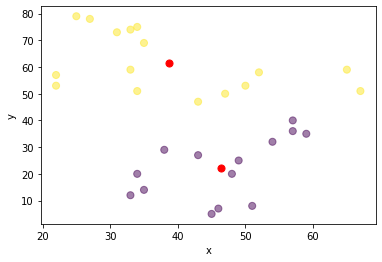

In [15]:
#realiza o plot do grafico da saida 
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:,0], centroides[:,1],c='red', s=50)
plt.xlabel("x")
plt.ylabel("y")

Exemplo do Algoritmo Supervisionado -> KNN

In [16]:
#importando as bibliotecas 
import pylab as pl #utilizada para pltar os graficos 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np


In [17]:
#cria a rotina para utilizar o dataset Iris 
iris = datasets.load_iris()

In [21]:
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris ['feature_names'] + ['target'])

In [22]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


In [23]:
#transforma os dados em array
x = df_iris.iloc[:, :-1].values #dados de entrada
y = df_iris.iloc[:, 4].values #saidas ou targets 

In [25]:
#realiza a divisão dos dados entre treinamento e teste 
from sklearn.model_selection import train_test_split #função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)#divide 20% pata teste 

In [28]:
#realiza o processo de normalização dos dados 
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler() #objeto normaliza os dados 
scaler.fit(X_train) #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#treina o modelo
from sklearn.neighbors import  KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a contrução por meio de cinco vizinhos 
classifier.fit(X_train, y_train) #aplica a classificação 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
# constroi a matriz de confusão para comparar o modelo criado 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



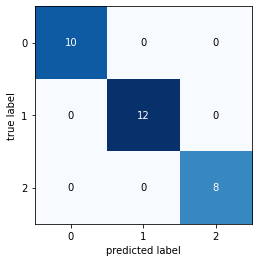

In [33]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Exemplo do Algoritmo supervisionado - Arvore de Decisão


In [34]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador Arvore de Decisão
from sklearn import metrics #importa métricas de avaliação 

In [35]:
#cria o objeto de classificação atraves da Arvore 
clf = DecisionTreeClassifier()

In [36]:
#realiza o treinamento do classificador 
y_pred = clf.fit(X_train, y_train)

In [37]:
#realiza a pevisão do classificador 
y_pred = clf.predict(X_test)

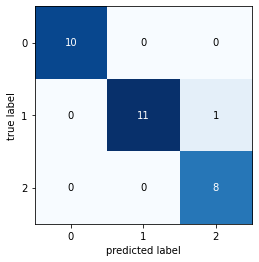

In [38]:
#avaliando o modelo 

#Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [39]:
#visualização da arvore de decisão 
#impor das bibliotecas necessarias para realizar a visualização a arvore de decisão 
from sklearn.tree import  export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

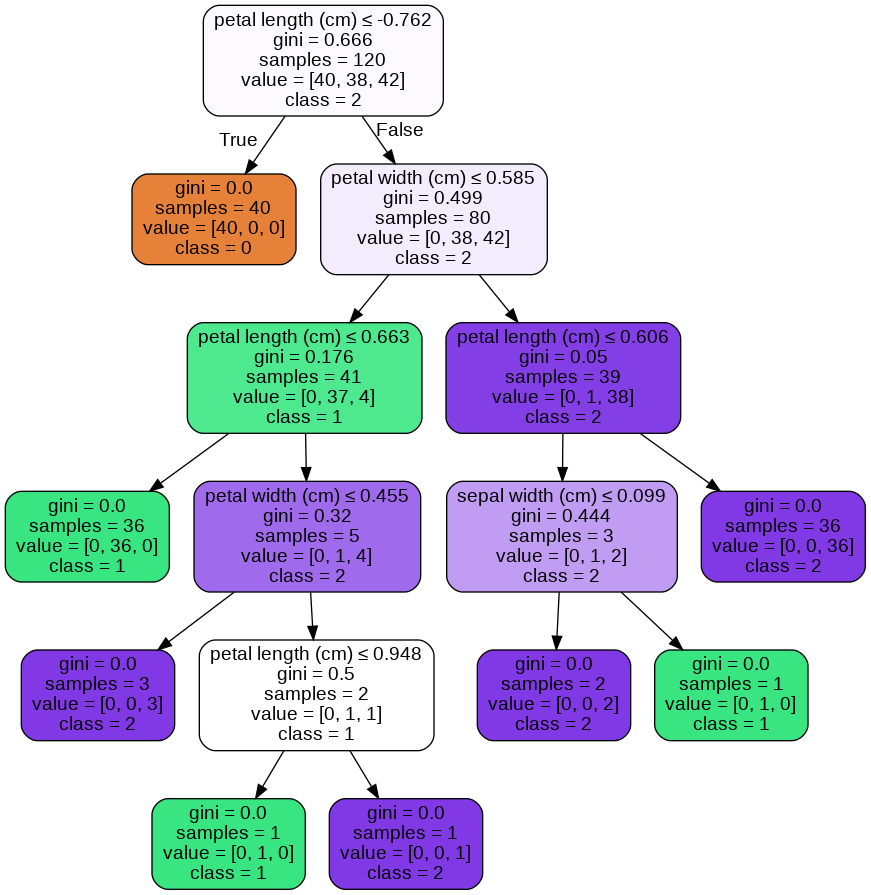

In [43]:
#constroi a arvore de decisão para DB iris 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names= iris.feature_names, class_names= ['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [44]:
#biblioteca necessaria para a construção SVM
from sklearn.svm import SVC

In [45]:
#cria o objeto svm
clf = SVC(gamma='auto') #escolhe o Kennel linear 


In [46]:
#realiza a classificação via SVM
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
#realiza a previsão de classificação
y_pred = clf.predict(X_test)

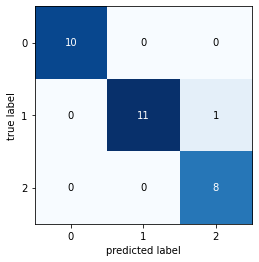

In [48]:
#Avaliando o modelo

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Exemplos de Rede Neurais 

In [49]:
#definição das bibliotecas 
from sklearn.neural_network import MLPClassifier

In [51]:
#define a configuração da rede 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1) #rede com duas camadas escondidas e com 5 neuronios 


In [52]:
#realiza o fit do modelo
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
#realiza a predição
y_pred=clf.predict(X_test)

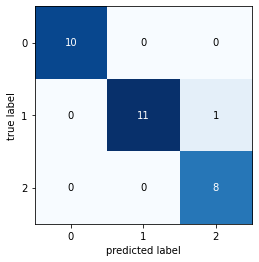

In [54]:
#Avaliando o modelo 
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()